# Анализ цен на квартиры по данным cian.ru

Я не живу в Сочи, но была мысль купить там квартиру. Мне был непонятен уровень цен. Иногда встречались объявления с очень красивыми квартирами, которые продавали за сравнительно небольшие деньги. Хотелось бы понять, не являются ли эти объявления моешнничискими или просто ненастоящими, служащими только для привлечения клиентов для недобросовестных риэлторов.

Две основные **цели проекта**:
1. Понять приемлемый уровень цен за квадратный метр в Сочи.
2. Научиться отсеивать фейковые обяъявления.


Данные получены 02.04.2023...03.04.2023 с помощью экспорта с сайта cian.ru

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('max_columns', None)

[Районы Сочи](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%A0%D0%B0%D0%B9%D0%BE%D0%BD%D1%8B_%D0%A1%D0%BE%D1%87%D0%B8)

[Микрорайоны Сочи](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9C%D0%B8%D0%BA%D1%80%D0%BE%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D1%8B_%D0%A1%D0%BE%D1%87%D0%B8)

## Загрузка данных

Микрорайоны

In [2]:
df_s_districts = pd.DataFrame({
    'Светлана мкр': [43.574540, 39.740264],
    'Якорная Щель мкр': [43.766742, 39.498689],
    'Новый Сочи мкр': [43.610072, 39.713863],
    'Мамайка мкр': [43.632293, 39.702760],
    'Донская мкр': [43.618851, 39.726026],
    'Адлер жилрайон': [43.438172, 39.911178],
    'Заречный мкр': [43.600620, 39.723852],
    'Лазаревское жилрайон': [43.908434, 39.333382],
    'Центральный мкр': [43.585714, 39.722657],
    'Бытха мкр': [43.566167, 39.765723],
    'Больничный Городок мкр': [43.596683, 39.740031],
    'Приморье мкр': [43.554192, 39.775398],
    'Головинка мкр': [43.793752, 39.468838],
    'Хоста жилрайон': [43.512829, 39.873709],
    'Новая Мацеста мкр': [43.547090, 39.795250],
    'Завокзальный мкр': [43.589018, 39.734955],
    'Блиново мкр': [43.422931, 39.963523],
    'Лазурный Берег кп': [43.645779, 39.680868],
    'Солоники мкр': [43.884633, 39.373851],
    'пос. Мамайский Перевал': [43.653039, 39.690031]
}).T.reset_index()

df_s_districts.columns = ['Район', 'Широта', 'Долгота']
df_s_districts

,Район,Широта,Долгота
0,Светлана мкр,43.574540,39.740264
1,Якорная Щель мкр,43.766742,39.498689
2,Новый Сочи мкр,43.610072,39.713863
3,Мамайка мкр,43.632293,39.702760
4,Донская мкр,43.618851,39.726026
5,Адлер жилрайон,43.438172,39.911178
6,Заречный мкр,43.600620,39.723852
7,Лазаревское жилрайон,43.908434,39.333382
8,Центральный мкр,43.585714,39.722657
9,Бытха мкр,43.566167,39.765723


Данные по ценам на квартиры

In [3]:
df_s = pd.read_excel('sochi_flats.xls')

In [4]:
df_s.drop_duplicates(subset='ID', inplace=True)

In [5]:
df_s.head()

,ID,Количество комнат,Тип,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Есть телефон,Название ЖК,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,284896254,"2, Изолированная",Продажа квартиры,"Краснодарский край, Сочи, улица Гагарина, 8",50.0,3/5,NaN,"13500000 руб., Свободная продажа, Возможна ипо...",+79676539298,"Всеми любимый Заречный мкр-н города, идеально ...",Косметический,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/sale/flat/284896254
1,283421648,2,Продажа квартиры,"Краснодарский край, Сочи, Якорная Щель мкр, ул...",50.0/10.0,"4/5, Панельный",NaN,"7400000 руб., Свободная продажа",+79182107149,Двухкомнатная квартира возле моря! Отличное пр...,Косметический,NaN,"Балкон (1), Лоджия (1)",На улицу и двор,Совмещенный (1),Да,NaN,2.8,NaN,NaN,https://www.cian.ru/sale/flat/283421648
2,283421650,2,Продажа квартиры,"Краснодарский край, Сочи, Новый Сочи мкр, улиц...",53.0/10.0,"1/5, Панельный",NaN,"9250000 руб., Свободная продажа",+79182107149,Срочная продажа! Ликвидное предложение! Цена н...,Косметический,NaN,"Балкон (1), Лоджия (1)",На улицу и двор,Раздельный (1),Нет,NaN,2.8,NaN,NaN,https://www.cian.ru/sale/flat/283421650
3,265022100,"2, Изолированная",Продажа квартиры,"Краснодарский край, Сочи, улица Гагарина, 60",59.5/38.1/13.1,6/12,NaN,"14800000 руб., Свободная продажа, Возможна ипо...",+79181507740,"Продается 2-к квартира по ул. Гагарина, 6/12 э...",Евроремонт,NaN,Лоджия (1),Во двор,Раздельный (1),NaN,NaN,NaN,Пасс (2),NaN,https://www.cian.ru/sale/flat/265022100
4,268814475,"2, Изолированная",Продажа квартиры,"Краснодарский край, Сочи, улица Гастелло, 27Бк1",54.0/27.0/11.0,"14/18, Монолитный",наземная,"15000000 руб., Свободная продажа, Возможна ипо...","+79183906532, +79654643704","Абсолютно новая, абсолютно видовая, красивая к...",Евроремонт,NaN,Балкон (1),На улицу и двор,"Совмещенный (1), Раздельный (1)",Да,"Адлер, Корпус - Дом 27Б Корпус 1, Год постройк...",2.8,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/sale/flat/268814475


In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 764
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    684 non-null    int64  
 1   Количество комнат     684 non-null    object 
 2   Тип                   684 non-null    object 
 3   Адрес                 684 non-null    object 
 4   Площадь, м2           684 non-null    object 
 5   Дом                   684 non-null    object 
 6   Парковка              316 non-null    object 
 7   Цена                  684 non-null    object 
 8   Телефоны              684 non-null    object 
 9   Описание              684 non-null    object 
 10  Ремонт                682 non-null    object 
 11  Площадь комнат, м2    107 non-null    object 
 12  Балкон                532 non-null    object 
 13  Окна                  479 non-null    object 
 14  Санузел               596 non-null    object 
 15  Есть телефон          1

## Извлечение признков

In [7]:
# Достанем значения площали квартир
df_s['Площадь, м2'] = df_s['Площадь, м2'].apply(lambda x: float(x.split('/')[0]))

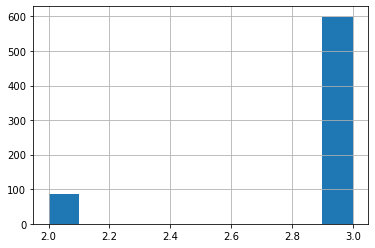

In [8]:
# Посмотрим, сколько описаний есть внутри одной ячейки
df_s['Цена'].apply(lambda x: len(x.split(','))).hist();

In [9]:
# Достанем тип продажи
df_s['Тип продажи'] = df_s['Цена'].apply(lambda x: x.split(', ')[1])
df_s['Тип продажи'].value_counts()

Свободная продажа    684
Name: Тип продажи, dtype: int64

In [10]:
# Достанем цену
df_s['Цена'] = df_s['Цена'].apply(lambda x: float(x.split(' ')[0]))

In [11]:
df_s['Количество комнат'] = df_s['Количество комнат'].apply(lambda x: int(x.split(', ')[0]))
df_s['Этаж'] = df_s['Дом'].apply(lambda x: int(x.split('/')[0]))
df_s['Этажей в доме'] = df_s['Дом'].apply(lambda x: int(x.split(',')[0].split('/')[1]))
df_s['Наличие лифта'] = df_s['Лифт'].notna().astype(int)
df_s['Наличие балкона'] = df_s['Балкон'].notna().astype(int)
df_s['Наличие парковки'] = df_s['Парковка'].notna().astype(int)

# Улица
df_s['Улица'] = df_s['Адрес'].apply(lambda x: x.split(', ')[-2])
df_s['Улица'].value_counts()

Виноградная улица     72
улица Санаторная      32
Курортный проспект    31
улица Пирогова        30
улица Клубничная      28
                      ..
Пятигорская улица      1
улица Шоссейная        1
улица Делегатская      1
Одесская улица         1
улица Изумрудная       1
Name: Улица, Length: 140, dtype: int64

In [12]:
def get_house_type(description):
    """Функция, которая достаёт тип дома из описания объекта"""
    h_type = description.split(', ')[-1]
    if h_type.isalpha():
        return h_type
    else:
        return(float('nan'))
    
    
df_s['Тип дома'] = df_s['Дом'].apply(get_house_type)

In [13]:
def get_district(address):
    """Функция, которая достаёт район из адреса объекта"""
    street = address.split(', ')[-2]
    district = address.split(', ')[2]
    if street == district:
        return 'Район не указан'
    else:
        return district
    
# Районы
df_s['Район'] = df_s['Адрес'].apply(get_district)

In [14]:
df_s['Район'].value_counts()

Район не указан           242
Новый Сочи мкр            131
Лазаревское жилрайон       75
Адлер жилрайон             50
Центральный мкр            47
Светлана мкр               24
Мамайка мкр                22
с. Раздольное              22
Донская мкр                12
Заречный мкр               10
Завокзальный мкр            9
Дагомыс пгт                 9
Бытха мкр                   7
Хоста жилрайон              6
Больничный Городок мкр      5
Солоники мкр                1
с. Орел-Изумруд             1
Новая Мацеста мкр           1
улица Таврическая           1
Приморье мкр                1
улица Единство              1
Головинка мкр               1
Лазурный Берег кп           1
Виноградная улица           1
пос. Мамайский Перевал      1
Якорная Щель мкр            1
Блиново мкр                 1
с. Веселое                  1
Name: Район, dtype: int64

In [15]:
df_s['Санузел'].fillna('Неизвестно (1)', inplace=True)
df_s['Санузел'].value_counts()

Совмещенный (1)                    333
Раздельный (1)                     138
Совмещенный (1), Раздельный (1)     90
Неизвестно (1)                      88
Совмещенный (2)                     16
Раздельный (2)                      14
Совмещенный (2), Раздельный (2)      3
Совмещенный (1), Раздельный (2)      1
Совмещенный (3)                      1
Name: Санузел, dtype: int64

In [16]:
df_s['Количество санузлов'] = df_s['Санузел'].apply(lambda x: len(x.split(',')))

In [17]:
df_s['Тип продажи'].unique()

array(['Свободная продажа'], dtype=object)

In [18]:
df_s['Ремонт'].fillna('Нет данных', inplace=True)
df_s['Ремонт'].unique()

array(['Косметический', 'Евроремонт', 'Нет данных', 'Дизайнерский'],
      dtype=object)

In [19]:
df_s.head()

,ID,Количество комнат,Тип,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Есть телефон,Название ЖК,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Тип продажи,Этаж,Этажей в доме,Наличие лифта,Наличие балкона,Наличие парковки,Улица,Тип дома,Район,Количество санузлов
0,284896254,2,Продажа квартиры,"Краснодарский край, Сочи, улица Гагарина, 8",50.0,3/5,NaN,13500000.0,+79676539298,"Всеми любимый Заречный мкр-н города, идеально ...",Косметический,NaN,NaN,NaN,Неизвестно (1),NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/sale/flat/284896254,Свободная продажа,3,5,0,0,0,улица Гагарина,NaN,Район не указан,1
1,283421648,2,Продажа квартиры,"Краснодарский край, Сочи, Якорная Щель мкр, ул...",50.0,"4/5, Панельный",NaN,7400000.0,+79182107149,Двухкомнатная квартира возле моря! Отличное пр...,Косметический,NaN,"Балкон (1), Лоджия (1)",На улицу и двор,Совмещенный (1),Да,NaN,2.8,NaN,NaN,https://www.cian.ru/sale/flat/283421648,Свободная продажа,4,5,0,1,0,улица Череповецкая,Панельный,Якорная Щель мкр,1
2,283421650,2,Продажа квартиры,"Краснодарский край, Сочи, Новый Сочи мкр, улиц...",53.0,"1/5, Панельный",NaN,9250000.0,+79182107149,Срочная продажа! Ликвидное предложение! Цена н...,Косметический,NaN,"Балкон (1), Лоджия (1)",На улицу и двор,Раздельный (1),Нет,NaN,2.8,NaN,NaN,https://www.cian.ru/sale/flat/283421650,Свободная продажа,1,5,0,1,0,улица Санаторная,Панельный,Новый Сочи мкр,1
3,265022100,2,Продажа квартиры,"Краснодарский край, Сочи, улица Гагарина, 60",59.5,6/12,NaN,14800000.0,+79181507740,"Продается 2-к квартира по ул. Гагарина, 6/12 э...",Евроремонт,NaN,Лоджия (1),Во двор,Раздельный (1),NaN,NaN,NaN,Пасс (2),NaN,https://www.cian.ru/sale/flat/265022100,Свободная продажа,6,12,1,1,0,улица Гагарина,NaN,Район не указан,1
4,268814475,2,Продажа квартиры,"Краснодарский край, Сочи, улица Гастелло, 27Бк1",54.0,"14/18, Монолитный",наземная,15000000.0,"+79183906532, +79654643704","Абсолютно новая, абсолютно видовая, красивая к...",Евроремонт,NaN,Балкон (1),На улицу и двор,"Совмещенный (1), Раздельный (1)",Да,"Адлер, Корпус - Дом 27Б Корпус 1, Год постройк...",2.8,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/sale/flat/268814475,Свободная продажа,14,18,1,1,1,улица Гастелло,Монолитный,Район не указан,2


## Изучение данных

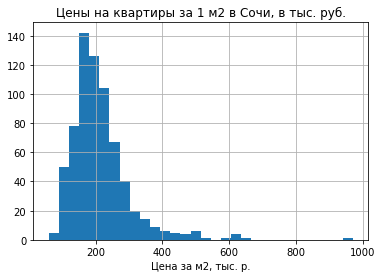

In [20]:
# Цена за квадратный метр
df_s['Цена за м2'] = df_s['Цена'] / df_s['Площадь, м2']

# Гистограмма: цена в тысячах рублей
plt.title('Цены на квартиры за 1 м2 в Сочи, в тыс. руб.')
(df_s['Цена за м2'] / 1000).hist(bins=30)
plt.xlabel('Цена за м2, тыс. р.')
plt.show()

In [21]:
# Описательная статисткиа
df_s['Цена за м2'].describe()

count       684.000000
mean     213765.687865
std       89465.018552
min       59259.259259
25%      158878.968254
50%      199342.743153
75%      244196.514308
max      970588.235294
Name: Цена за м2, dtype: float64

**Адекватная цена - около 200 000 +/- 45 000 р/м2**

In [22]:
# Уберём слишком дорогие объекты: всё, что больше median+1.5*IQR и посмотрим на цены
iqr = df_s['Цена за м2'].quantile(0.75) - df_s['Цена за м2'].quantile(0.25)
prices_sochi_sq_m = df_s['Цена за м2'][df_s['Цена за м2'] <= df_s['Цена за м2'].median() + 1.5*iqr]

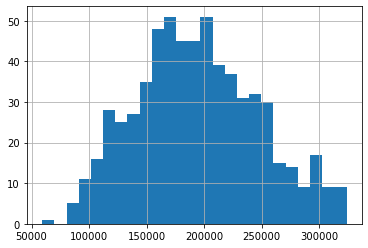

In [23]:
prices_sochi_sq_m.hist(bins=25);

In [24]:
# Снова посмотрим на описательную статистику
prices_sochi_sq_m.describe()

count       630.000000
mean     194530.312572
std       53499.944119
min       59259.259259
25%      157407.407407
50%      191987.179487
75%      230769.230769
max      323529.411765
Name: Цена за м2, dtype: float64

In [25]:
# Больше какой цены находится 95% наблюдений
prices_sochi_sq_m.quantile(0.05)

110367.75151749968

* Наиболее вероятные цены за квадратный метр - более 110 000 р./м2. Ниже этой цены особенно в центральном районе Сочи - скорее всего, ложные объявления.
* Нужны качественные признаки фейков, чтобы автоматически их отсеивать. Вручную размечать долго. Идеи [тут](https://www.cian.ru/stati-kreks-peks-feik-kak-raspoznat-lozhnye-obyavleniya-o-prodazhe-nedvizhimosti-319093/) и [тут](https://pskov.cian.ru/stati-instruktsija-kak-raspoznat-fejkovoe-objavlenie-325224/)

In [26]:
# Расчитаем расстояние центров микрорайонов до центра Сочи - это будет второй признак

In [27]:
# Координаты центров микрорайонов
df_s = df_s.merge(right=df_s_districts, how='left', left_on='Район', right_on='Район')

In [28]:
# Расчёт расстояния до центра Сочи в километрах
import math


def haversine(coord1, coord2, km=True):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    scaling = 1000 if km else 1

    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2

    return 2 * R * math.atan2(math.sqrt(a), math.sqrt(1 - a)) / scaling


sochi_center_gps = (43.585472, 39.723098)
df_s['Расстояние_до_центра'] = df_s.apply(
    lambda x: haversine(sochi_center_gps, (x['Широта'], x['Долгота'])),
    axis='columns')

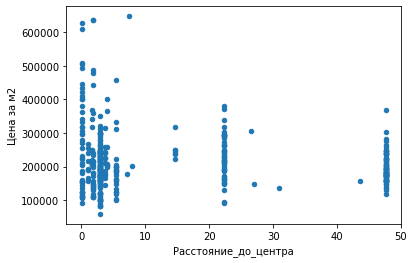

In [29]:
# Как влияет расстояние до центра на цену
df_s.plot(kind='scatter',
          x='Расстояние_до_центра',
          y='Цена за м2');

In [30]:
df_s[['Район', 'Расстояние_до_центра']].drop_duplicates(subset='Район').sort_values(by='Расстояние_до_центра')
# Районы самого Сочи находятся в радиусе 8 км. ОКруглим до 10,
# т.к. оперируем расстояниями между центрами каждого района,
# а у каждого района тоже есть "радиус".

,Район,Расстояние_до_центра
35,Центральный мкр,0.044574
155,Завокзальный мкр,1.033468
19,Заречный мкр,1.685951
6,Светлана мкр,1.841609
48,Больничный Городок мкр,1.848158
2,Новый Сочи мкр,2.835484
9,Донская мкр,3.720107
45,Бытха мкр,4.050642
7,Мамайка мкр,5.459233
132,Приморье мкр,5.465200


In [31]:
# Да, всё это фейковые объявления с красивыми фотографиями, но низкой ценой для центра
df_s[(df_s['Цена за м2'] <= 110000)
     & (df_s['Расстояние_до_центра'] < 10)]['Ссылка на объявление']

72     https://www.cian.ru/sale/flat/285601447
73     https://www.cian.ru/sale/flat/285601430
74     https://www.cian.ru/sale/flat/285601411
75     https://www.cian.ru/sale/flat/279362407
78     https://www.cian.ru/sale/flat/285601510
302    https://www.cian.ru/sale/flat/242840870
324    https://www.cian.ru/sale/flat/276195678
345    https://www.cian.ru/sale/flat/283478072
353    https://www.cian.ru/sale/flat/284180141
354    https://www.cian.ru/sale/flat/285543725
359    https://www.cian.ru/sale/flat/276780314
360    https://www.cian.ru/sale/flat/277238185
381    https://www.cian.ru/sale/flat/275310388
400    https://www.cian.ru/sale/flat/278516069
420    https://www.cian.ru/sale/flat/273188617
428    https://www.cian.ru/sale/flat/278383653
434    https://www.cian.ru/sale/flat/269239477
447    https://www.cian.ru/sale/flat/277071762
557    https://www.cian.ru/sale/flat/284613124
582    https://www.cian.ru/sale/flat/278751961
644    https://www.cian.ru/sale/flat/277489037
670    https:

In [32]:
# Признак фейковых объявлений
df_s['Fake'] = ((df_s['Цена за м2'] <= 110000) &
                (df_s['Расстояние_до_центра'] < 10)).astype(int)

In [33]:
# Доля фейков
df_s['Fake'].sum() / df_s['Fake'].count()

0.03216374269005848

In [34]:
# Удалим все фейковые объявления
df_s = df_s[df_s['Fake'] != 1]

In [35]:
# Посмотрим на медианные цены по типам домов
df_s.groupby('Тип дома').aggregate({'Цена за м2': 'median', 'ID': 'count'}).sort_values(by='Цена за м2')
# Странно, что панельные дома стоят дороже монолитных

,Цена за м2,ID
Тип дома,,
Блочный,192982.456140,29
Монолитный,194000.000000,377
Панельный,204545.454545,127
Кирпичный,221153.846154,41


In [36]:
# Посмотрим на медианные цены по районам
median_prices = df_s.groupby('Район').aggregate({
    'Цена за м2': 'median',
    'ID': 'count'
}).sort_values(by='Цена за м2')
median_prices

,Цена за м2,ID
Район,,
с. Орел-Изумруд,118032.786885,1
с. Веселое,127272.727273,1
Головинка мкр,136105.860113,1
Якорная Щель мкр,148000.000000,1
Солоники мкр,156873.111782,1
с. Раздольное,156946.790541,22
Светлана мкр,158000.000000,21
Виноградная улица,177083.333333,1
Дагомыс пгт,178217.821782,9


In [37]:
df_for_map = median_prices.reset_index().merge(right=df_s_districts,
                                               how='left',
                                               left_on='Район',
                                               right_on='Район')
df_for_map.dropna(inplace=True)

In [38]:
df_for_map

,Район,Цена за м2,ID,Широта,Долгота
2,Головинка мкр,136105.860113,1,43.793752,39.468838
3,Якорная Щель мкр,148000.000000,1,43.766742,39.498689
4,Солоники мкр,156873.111782,1,43.884633,39.373851
6,Светлана мкр,158000.000000,21,43.574540,39.740264
9,Новая Мацеста мкр,178955.223881,1,43.547090,39.795250
10,Мамайка мкр,185364.125122,20,43.632293,39.702760
11,Лазаревское жилрайон,186335.403727,75,43.908434,39.333382
12,Завокзальный мкр,192307.692308,9,43.589018,39.734955
15,Новый Сочи мкр,201552.868658,118,43.610072,39.713863
16,пос. Мамайский Перевал,202453.987730,1,43.653039,39.690031


In [39]:
# Центр сочи на Яндекс-картах: 43.585472, 39.723098
import folium
sochi_map = folium.Map(location=sochi_center_gps, zoom_start=10)

In [40]:
# Инициализация feature group для микрорайонов
prices = folium.map.FeatureGroup()

# ПРоходимся по микрорайоном добавляем к feature group
for lat, lng, in zip(df_for_map['Широта'], df_for_map['Долгота']):
    prices.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # размер маркеров
            color='orange',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Добавление комментариев к каждому маркеру
latitudes = list(df_for_map['Широта'])
longitudes = list(df_for_map['Долгота'])
labels = list(round(df_for_map['Цена за м2']))  # медианные цены (открываются при нажатии)
tooltips = list(df_for_map['ID'])  # размер выборки для расчёта мед.цены (открывается при наведении)

for lat, lng, label, ttip in zip(latitudes, longitudes, labels, tooltips):
    folium.Marker([lat, lng], popup=label, tooltip=ttip).add_to(sochi_map)    
    
# Смотрим цены на карте
sochi_map.add_child(prices)

По расположению и ценам привлекательный районы 
* Мамайка мкр;
* Бытха мкр;
* Новый Сочи мкр.

1. В районе "Светлана" по-прежнему осталось много ложных объявлений: низкая медианная цена.
2. Не исключено, что и в трёх районах выше есть фейки, т.к. критериев отсева недостаточно.  

In [41]:
# Смотрим подробнее. Мамайка
conditions = (df_s['Район'] == 'Мамайка мкр') & (df_s['Цена'] <= 10000000)
df_s[conditions]['Ссылка на объявление']
# С такими критериями все объявления ненастоящие

7      https://www.cian.ru/sale/flat/278676052
91     https://www.cian.ru/sale/flat/262839990
562    https://www.cian.ru/sale/flat/281278540
565    https://www.cian.ru/sale/flat/284525470
568    https://www.cian.ru/sale/flat/278038622
576    https://www.cian.ru/sale/flat/278449220
590    https://www.cian.ru/sale/flat/268184113
629    https://www.cian.ru/sale/flat/265355670
631    https://www.cian.ru/sale/flat/279910953
647    https://www.cian.ru/sale/flat/275326132
654    https://www.cian.ru/sale/flat/285633427
655    https://www.cian.ru/sale/flat/278864027
667    https://www.cian.ru/sale/flat/271949955
673    https://www.cian.ru/sale/flat/282086939
Name: Ссылка на объявление, dtype: object

In [42]:
# Смотрим подробнее. Бытха мкр
conditions = (df_s['Район'] == 'Бытха мкр') & (df_s['Цена'] <= 10000000)
df_s[conditions]['Ссылка на объявление']

Series([], Name: Ссылка на объявление, dtype: object)

In [43]:
# Смотрим подробнее. Новый Сочи мкр
conditions = (df_s['Район'] == 'Новый Сочи мкр') & (df_s['Цена'] <= 10000000)
df_s[conditions]['Ссылка на объявление']
# На этом районе нужно остановиться подробнее

2      https://www.cian.ru/sale/flat/283421650
86     https://www.cian.ru/sale/flat/283763592
171    https://www.cian.ru/sale/flat/284980482
219    https://www.cian.ru/sale/flat/283515038
288    https://www.cian.ru/sale/flat/281907554
289    https://www.cian.ru/sale/flat/280943791
290    https://www.cian.ru/sale/flat/285537488
292    https://www.cian.ru/sale/flat/285386672
294    https://www.cian.ru/sale/flat/276193909
299    https://www.cian.ru/sale/flat/285195990
300    https://www.cian.ru/sale/flat/284887388
301    https://www.cian.ru/sale/flat/272821262
303    https://www.cian.ru/sale/flat/285231090
304    https://www.cian.ru/sale/flat/284391688
307    https://www.cian.ru/sale/flat/277269147
356    https://www.cian.ru/sale/flat/278029550
362    https://www.cian.ru/sale/flat/279884070
363    https://www.cian.ru/sale/flat/270342391
364    https://www.cian.ru/sale/flat/279047033
365    https://www.cian.ru/sale/flat/280311675
369    https://www.cian.ru/sale/flat/284157964
374    https:

Три объявления от разных людей, но про один и тот же объект:
* https://sochi.cian.ru/sale/flat/284980482/
* https://sochi.cian.ru/sale/flat/283515038/
* https://sochi.cian.ru/sale/flat/283421650/

## Моделирование

Зачем? Чтобы был свой собстеннй метод оценки квартир

In [44]:
df_s_for_modelling = pd.get_dummies(df_s, columns=['Ремонт', 'Тип дома', 'Район'])

In [45]:
df_s_for_modelling.columns

Index(['ID', 'Количество комнат', 'Тип', 'Адрес', 'Площадь, м2', 'Дом',
       'Парковка', 'Цена', 'Телефоны', 'Описание', 'Площадь комнат, м2',
       'Балкон', 'Окна', 'Санузел', 'Есть телефон', 'Название ЖК',
       'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Ссылка на объявление',
       'Тип продажи', 'Этаж', 'Этажей в доме', 'Наличие лифта',
       'Наличие балкона', 'Наличие парковки', 'Улица', 'Количество санузлов',
       'Цена за м2', 'Широта', 'Долгота', 'Расстояние_до_центра', 'Fake',
       'Ремонт_Дизайнерский', 'Ремонт_Евроремонт', 'Ремонт_Косметический',
       'Ремонт_Нет данных', 'Тип дома_Блочный', 'Тип дома_Кирпичный',
       'Тип дома_Монолитный', 'Тип дома_Панельный', 'Район_Адлер жилрайон',
       'Район_Блиново мкр', 'Район_Больничный Городок мкр', 'Район_Бытха мкр',
       'Район_Виноградная улица', 'Район_Головинка мкр', 'Район_Дагомыс пгт',
       'Район_Донская мкр', 'Район_Завокзальный мкр', 'Район_Заречный мкр',
       'Район_Лазаревское жилрайон', 'Рай

In [46]:
columns = ['Количество комнат', 'Площадь, м2', 'Этаж', 'Этажей в доме',
           'Количество санузлов', 'Наличие лифта',
           'Наличие балкона', 'Наличие парковки', 'Ремонт_Евроремонт',
           'Ремонт_Косметический', 'Тип дома_Кирпичный', 'Тип дома_Монолитный',
           'Тип дома_Панельный', 'Район_Адлер жилрайон', 'Район_Блиново мкр',
           'Район_Больничный Городок мкр', 'Район_Бытха мкр',
           'Район_Головинка мкр', 'Район_Донская мкр', 'Район_Завокзальный мкр',
           'Район_Заречный мкр', 'Район_Лазаревское жилрайон',
           'Район_Лазурный Берег кп', 'Район_Мамайка мкр',
           'Район_Новая Мацеста мкр', 'Район_Новый Сочи мкр', 'Район_Приморье мкр',
           'Район_Светлана мкр', 'Район_Солоники мкр',
           'Район_Хоста жилрайон', 'Район_Центральный мкр',
           'Район_Якорная Щель мкр', 'Район_пос. Мамайский Перевал',
           'Район_с. Веселое', 'Район_с. Орел-Изумруд', 'Район_с. Раздольное',
           'Расстояние_до_центра', 'Цена за м2', 'Цена']

df_s_for_modelling = df_s_for_modelling[columns]

In [47]:
df_s_for_modelling.head()

,Количество комнат,"Площадь, м2",Этаж,Этажей в доме,Количество санузлов,Наличие лифта,Наличие балкона,Наличие парковки,Ремонт_Евроремонт,Ремонт_Косметический,Тип дома_Кирпичный,Тип дома_Монолитный,Тип дома_Панельный,Район_Адлер жилрайон,Район_Блиново мкр,Район_Больничный Городок мкр,Район_Бытха мкр,Район_Головинка мкр,Район_Донская мкр,Район_Завокзальный мкр,Район_Заречный мкр,Район_Лазаревское жилрайон,Район_Лазурный Берег кп,Район_Мамайка мкр,Район_Новая Мацеста мкр,Район_Новый Сочи мкр,Район_Приморье мкр,Район_Светлана мкр,Район_Солоники мкр,Район_Хоста жилрайон,Район_Центральный мкр,Район_Якорная Щель мкр,Район_пос. Мамайский Перевал,Район_с. Веселое,Район_с. Орел-Изумруд,Район_с. Раздольное,Расстояние_до_центра,Цена за м2,Цена
0,2,50.0,3,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,270000.000000,13500000.0
1,2,50.0,4,5,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,27.062907,148000.000000,7400000.0
2,2,53.0,1,5,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.835484,174528.301887,9250000.0
3,2,59.5,6,12,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,248739.495798,14800000.0
4,2,54.0,14,18,2,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,277777.777778,15000000.0


In [48]:
# Заполним пропуски в значениях расстояния до центра
df_s_for_modelling['Расстояние_до_центра'] = df_s_for_modelling[
    'Расстояние_до_центра'].fillna(
        value=df_s_for_modelling['Расстояние_до_центра'].mean())


In [49]:
df_s_for_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 683
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Количество комнат             662 non-null    int64  
 1   Площадь, м2                   662 non-null    float64
 2   Этаж                          662 non-null    int64  
 3   Этажей в доме                 662 non-null    int64  
 4   Количество санузлов           662 non-null    int64  
 5   Наличие лифта                 662 non-null    int32  
 6   Наличие балкона               662 non-null    int32  
 7   Наличие парковки              662 non-null    int32  
 8   Ремонт_Евроремонт             662 non-null    uint8  
 9   Ремонт_Косметический          662 non-null    uint8  
 10  Тип дома_Кирпичный            662 non-null    uint8  
 11  Тип дома_Монолитный           662 non-null    uint8  
 12  Тип дома_Панельный            662 non-null    uint8  
 13  Район

In [50]:
# Отберём только те факторы, которые имеют корреляцию с ценой более 0,1
correlations = df_s_for_modelling.corr()['Цена за м2']
correlations[abs(correlations) > 0.1]

Площадь, м2               -0.116087
Этажей в доме              0.137000
Количество санузлов       -0.152450
Ремонт_Евроремонт          0.228990
Район_Лазурный Берег кп    0.189204
Район_Центральный мкр      0.202005
Район_с. Раздольное       -0.113018
Расстояние_до_центра      -0.115541
Цена за м2                 1.000000
Цена                       0.873695
Name: Цена за м2, dtype: float64

In [51]:
cols = list(correlations[abs(correlations) > 0.1].index)
cols.remove('Цена за м2')
cols.remove('Цена')
cols

['Площадь, м2',
 'Этажей в доме',
 'Количество санузлов',
 'Ремонт_Евроремонт',
 'Район_Лазурный Берег кп',
 'Район_Центральный мкр',
 'Район_с. Раздольное',
 'Расстояние_до_центра']

In [52]:
def make_scatterplots(df, x_columns, y_column, ncols=3, figsize=(10, 20)):
    """
    Функция для построения нескольких диаграмм рассеяния в виде сетки.
    Каждая диаграмма рассеяния показывает свяь переменной y_column с переменными из списка x_columns.
    Сетка имеет 3 столбца. Количество строк в сетке изменяется в зависимости от необходимого количества графиков. 
        
    Входные параметры:
    * df - таблица с данными;
    * x_columns - список названий "влияющих" переменных;
    * y_column - название "зависимой" переменной;
    * ncols - количество столбцов в сетке для построения графиков
       
    """
    plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle(f'Связь {y_column} с другими переменными', fontsize=18, y=0.95)

    # Расчёт количества строк в сетке
    nrows = len(x_columns) // ncols + (len(x_columns) % ncols > 0)

    # Цикл по названиям столбцов
    for n, x_col in enumerate(x_columns):
        # добавление очередного subplot
        ax = plt.subplot(nrows, ncols, n + 1)

        # построение диаграммы рассеяния
        ax.scatter(df[x_col], df[y_column])

        # подписи по осям
        ax.set_ylabel(y_column)
        ax.set_xlabel(x_col)

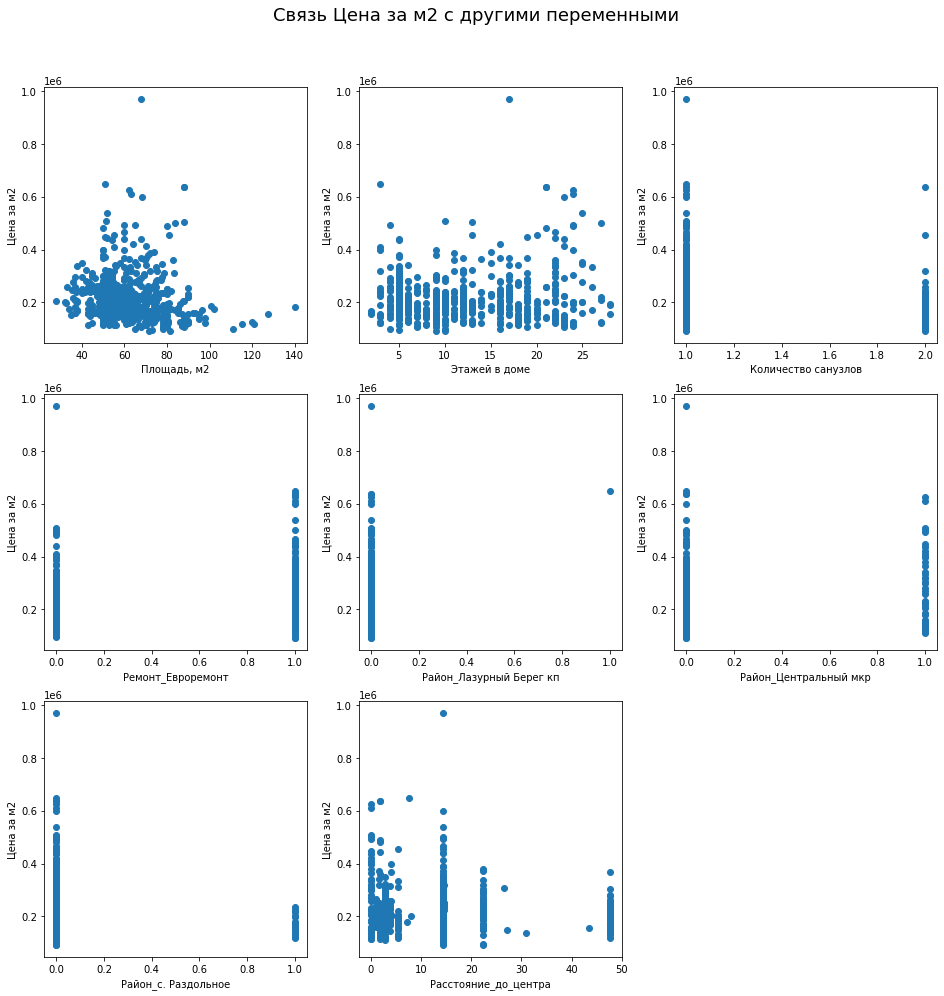

In [53]:
make_scatterplots(df=df_s_for_modelling,
                  x_columns=cols,
                  y_column='Цена за м2',
                  ncols=3, 
                  figsize=(16, 16))

In [54]:
#define response variable
y = df_s_for_modelling['Цена за м2']

#define predictor variables
x = df_s_for_modelling[cols]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Цена за м2   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     19.37
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.79e-26
Time:                        22:55:32   Log-Likelihood:                -8407.9
No. Observations:                 662   AIC:                         1.683e+04
Df Residuals:                     653   BIC:                         1.687e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [56]:
# Так себе модель...

In [62]:
# Теперь модель на цену за всё
# Отберём только те факторы, которые имеют корреляцию с ценой более 0,1
correlations = df_s_for_modelling.corr()['Цена']
correlations[abs(correlations) > 0.1]

Количество комнат          0.192957
Площадь, м2                0.343577
Этаж                       0.113283
Этажей в доме              0.203191
Ремонт_Евроремонт          0.212415
Район_Лазурный Берег кп    0.122550
Район_Новый Сочи мкр      -0.116756
Район_Центральный мкр      0.187378
Цена за м2                 0.873695
Цена                       1.000000
Name: Цена, dtype: float64

In [58]:
cols = list(correlations[abs(correlations) > 0.1].index)
cols.remove('Цена за м2')
cols.remove('Цена')
cols

['Количество комнат',
 'Площадь, м2',
 'Этаж',
 'Этажей в доме',
 'Ремонт_Евроремонт',
 'Район_Лазурный Берег кп',
 'Район_Новый Сочи мкр',
 'Район_Центральный мкр']

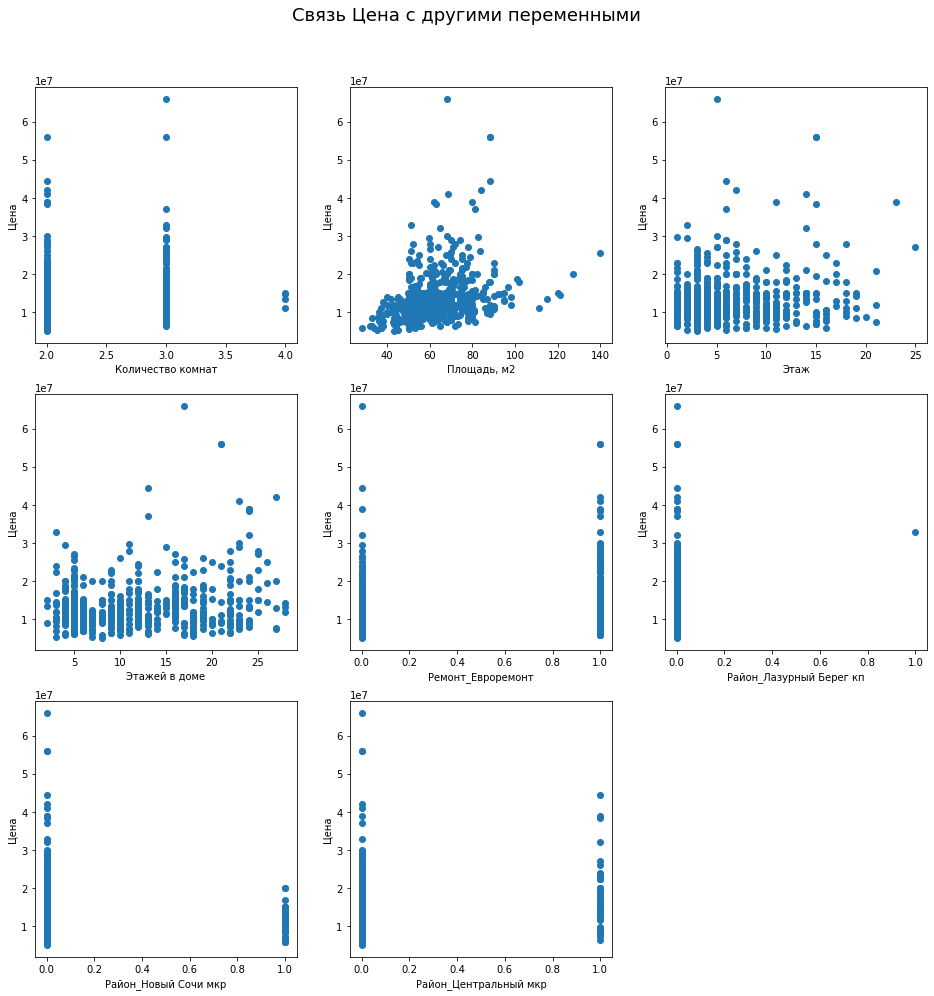

In [59]:
make_scatterplots(df=df_s_for_modelling,
                  x_columns=cols,
                  y_column='Цена',
                  ncols=3, 
                  figsize=(16, 16))

In [60]:
#define response variable
y = df_s_for_modelling['Цена']

#define predictor variables
x = df_s_for_modelling[cols]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     26.54
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.08e-35
Time:                        22:59:15   Log-Likelihood:                -11205.
No. Observations:                 662   AIC:                         2.243e+04
Df Residuals:                     653   BIC:                         2.247e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

**Модель получилась плохая. Нужно больше признаков**, но это и не основная цель проекта